In [4]:
using Plots
include("polyfit_function.jl")
include("Lagrange_interpolation.jl")

Lagrange (generic function with 1 method)

In [5]:
# Two-step Adams Bashforth Scheme (Explicit)

function ab2(f, tspan, y0, N)
    h = (tspan[2] - tspan[1]) / N
    
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    
    y = zeros(N + 1, 1)
    
    y[1] = y0
    
    y[2]=y[1]+h*f(t[1], y[1]) # First-order initial condition (FE)
    
    #y[2]=y0*exp(t[2]) # Exact value
    
    #k1=h*f(t[1], y[1])
    #k2=h*f(t[1]+h, y[1]+k1)
    #y[2]=y[1]+0.5*(k1+k2)
    
    # Two -step AB steps
    for i in 2:N
        y[i + 1] = y[i] + (3/2) *h* f(t[i], y[i]) - 0.5 *h* f(t[i-1], y[i-1])
    end

    return t, y
end

ab2 (generic function with 1 method)

In [6]:
function RK2(f, tspan, y0, N)
    h = (tspan[2] - tspan[1]) / N
    
    t = Vector(range(tspan[1], tspan[2], length=N+1))
    
    y = zeros(N + 1, 1)
    
    y[1] = y0
    
    
    # Two -step AB steps
    for i in 2:N+1
        k1=h*f(t[i-1], y[i-1])
        k2=h*f(t[i-1]+h, y[i-1]+k1)
        y[i]= y[i-1]+0.5*(k1+k2)
    end

    return t, y
end

RK2 (generic function with 1 method)

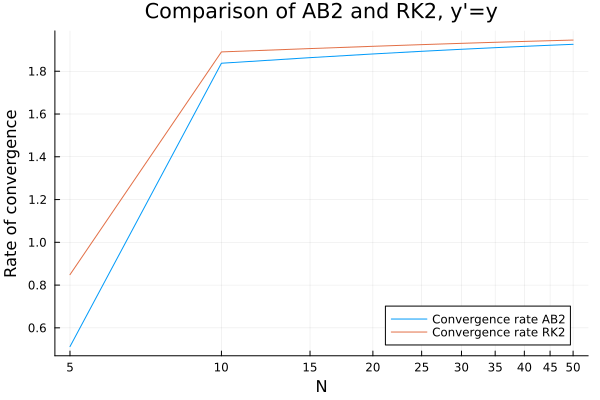

In [7]:
# Convergence test
using LinearAlgebra

y0 = 1.0
lambda= 1
tspan=[0 1.0]
K = 10
err_ab2 = zeros(K, 1)
err_rk2 = zeros(K, 1)
ns=zeros(K, 1)

f(t, y) = lambda * y

exact= y0*exp(lambda*tspan[2])

for k in 1:K
    
    N = 5*k
    
    ns[k]=N
    
    h = (tspan[2] - tspan[1]) / N
    
    
    (t, y1) = ab2(f, tspan, y0, N)
    (t, y2) = RK2(f, tspan, y0, N)
   
    err_ab2[k] = abs(exact .- y1[N+1])
    err_rk2[k] = abs(exact .- y2[N+1])
end

ork2=zeros(K)
oab2=zeros(K)
for i= 1:K
    pdeg1 = polyfit(log10.(ns[1:i]), log10.(err_ab2[1:i]),1)
    pdeg2 = polyfit(log10.(ns[1:i]), log10.(err_rk2[1:i]),1)
    oab2[i]=abs(pdeg1[2])
    ork2[i]=abs(pdeg2[2])
end
plot(ns, oab2, xaxis=:log, label="Convergence rate AB2", title="Comparison of AB2 and RK2, y'=y",xlabel="N", ylabel="Rate of convergence", xticks=ns, xformatter=x -> string(Int(round(x))))
plot!(ns, ork2, xaxis=:log, label="Convergence rate RK2")

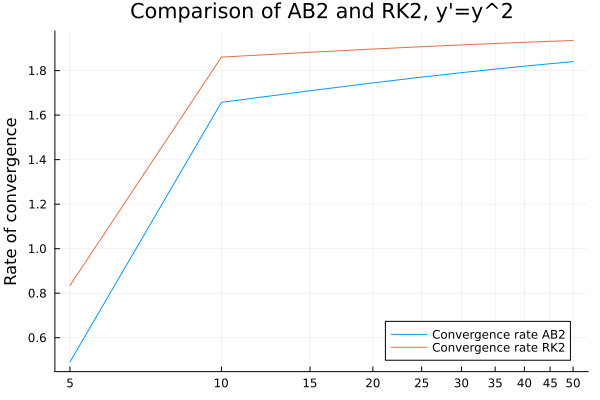

In [8]:
# Convergence test
using LinearAlgebra

y0 = 1.0
tspan=[0 1/2]
K = 10
err_ab2 = zeros(K, 1)
err_rk2 = zeros(K, 1)
ns=zeros(K, 1)

f(t, y) =  y^2

exact= 2

for k in 1:K
    
    N = 5*k
    
    ns[k]=N
    
    h = (tspan[2] - tspan[1]) / N
    
    
    (t, y1) = ab2(f, tspan, y0, N)
    (t, y2) = RK2(f, tspan, y0, N)
   
    err_ab2[k] = abs(exact .- y1[N+1])
    err_rk2[k] = abs(exact .- y2[N+1])
end

ork2=zeros(K)
oab2=zeros(K)
for i= 1:K
    pdeg1 = polyfit(log10.(ns[1:i]), log10.(err_ab2[1:i]),1)
    pdeg2 = polyfit(log10.(ns[1:i]), log10.(err_rk2[1:i]),1)
    oab2[i]=abs(pdeg1[2])
    ork2[i]=abs(pdeg2[2])
end
plot(ns, oab2, xaxis=:log, label="Convergence rate AB2", title="Comparison of AB2 and RK2, y'=y^2", ylabel="Rate of convergence", xticks=ns, xformatter=x -> string(Int(round(x))))
plot!(ns, ork2, xaxis=:log, label="Convergence rate RK2")

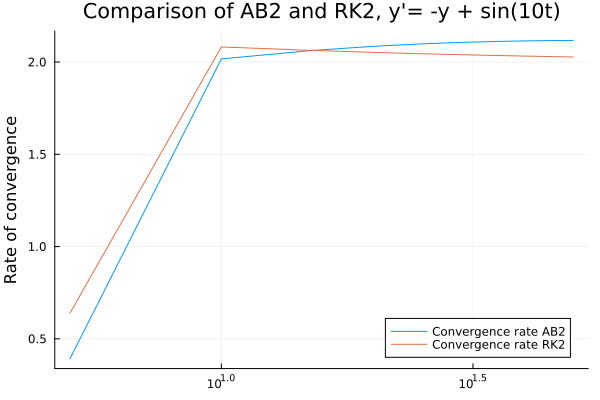

In [9]:
# Convergence test
using LinearAlgebra

y0 = 1.0
tspan=[0 1]
K = 10
err_ab2 = zeros(K, 1)
err_rk2 = zeros(K, 1)
ns=zeros(K, 1)

f(t, y) = - y .+ sin.(10*t)


for k in 1:K
    
    N = 5*k
    
    ns[k]=N
    
    h = (tspan[2] - tspan[1]) / N
    
    
    (t, y1) = ab2(f, tspan, y0, N)
    (t, y2) = RK2(f, tspan, y0, N)
    
    exact= -(1/101)* exp.(-t) .*(-111 .+10*exp.(t) .*cos.(10*t).- exp.(t) .*sin.(10*t))

    err_ab2[k] = abs(exact[N+1] .- y1[N+1])
    err_rk2[k] = abs(exact[N+1] .- y2[N+1])
end

ork2=zeros(K)
oab2=zeros(K)
for i= 1:K
    pdeg1 = polyfit(log10.(ns[1:i]), log10.(err_ab2[1:i]),1)
    pdeg2 = polyfit(log10.(ns[1:i]), log10.(err_rk2[1:i]),1)
    oab2[i]=abs(pdeg1[2])
    ork2[i]=abs(pdeg2[2])
end
plot(ns, oab2, xaxis=:log, label="Convergence rate AB2", title="Comparison of AB2 and RK2, y'= -y + sin(10t)", ylabel="Rate of convergence")
plot!(ns, ork2, xaxis=:log, label="Convergence rate RK2")

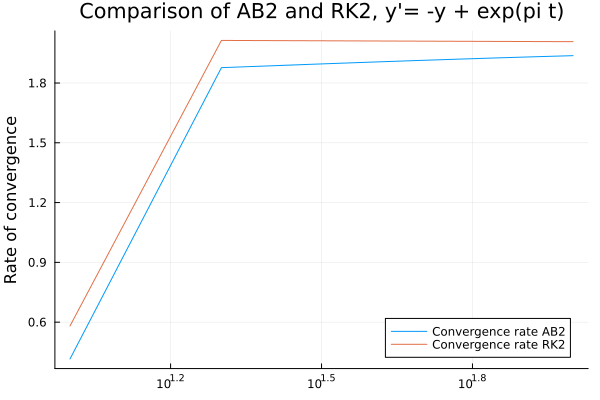

In [10]:
# Convergence test
using LinearAlgebra

y0 = 1.0
tspan=[0 1]
K = 10
err_ab2 = zeros(K, 1)
err_rk2 = zeros(K, 1)
ns=zeros(K, 1)

f(t, y)= -y .+ exp.(pi .* t)
exact= (exp(pi*tspan[2])+ pi* exp(-tspan[2]))/(1+pi)

for k in 1:K
    
    N = 10*k
    
    ns[k]=N
    
    h = (tspan[2] - tspan[1]) / N
    
    
    (t, y1) = ab2(f, tspan, y0, N)
    (t, y2) = RK2(f, tspan, y0, N)
   
    err_ab2[k] = abs(exact .- y1[N+1])
    err_rk2[k] = abs(exact .- y2[N+1])
end

ork2=zeros(K)
oab2=zeros(K)
for i= 1:K
    pdeg1 = polyfit(log10.(ns[1:i]), log10.(err_ab2[1:i]),1)
    pdeg2 = polyfit(log10.(ns[1:i]), log10.(err_rk2[1:i]),1)
    oab2[i]=abs(pdeg1[2])
    ork2[i]=abs(pdeg2[2])
end
plot(ns, oab2, xaxis=:log, label="Convergence rate AB2", title="Comparison of AB2 and RK2, y'= -y + exp(pi t)", ylabel="Rate of convergence")
plot!(ns, ork2, xaxis=:log, label="Convergence rate RK2")